# Ensemble methods 

-> combine multiple models to improve the overall performance, robustness, and accuracy of predictions

Types of Ensemble Methods:

**Bagging (Bootstrap Aggregating):**

Principle: Involves training the same algorithm many times using different subsets of the training data. Each model gets a vote on the final prediction.

Example: Random Forest is a popular bagging ensemble method. It combines multiple decision trees, each trained on a random subset of the training data.

Advantages: It reduces variance and helps to avoid overfitting.


**Boosting:**

Principle: Sequentially train models, where each model attempts to correct the errors of the previous one. Each model focuses more on the instances that were misclassified by previous models.

Examples: AdaBoost (Adaptive Boosting), Gradient Boosting, XGBoost, LightGBM, and CatBoost.

Advantages: It reduces both bias and variance, leading to more accurate predictions. However, it can be prone to overfitting with noisy datasets.


**Stacking (Stacked Generalization):**

Principle: It involves training a new model to combine the predictions of several base models. The base models are trained on the full dataset, and then the second-level model (meta-model) is trained on the outputs of the base models as features.

Example: A stacked model where the base level can include algorithms like decision trees, support vector machines, and neural networks, while the meta-model could be a logistic regression.

Advantages: It can yield higher predictive accuracy than individual models.

# AdaBoost

## The Data

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Goal

The general goal here is to create a **gerneral guideline** for features people should look out for when picking mushrooms.

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

<AxesSubplot:xlabel='class', ylabel='count'>

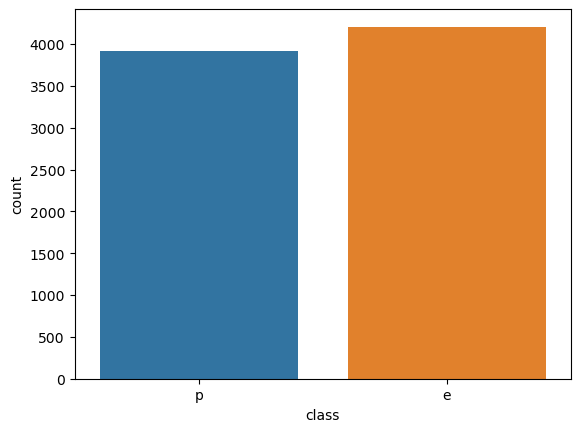

In [4]:
sns.countplot(data=df,x='class', hue='class')

In [5]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


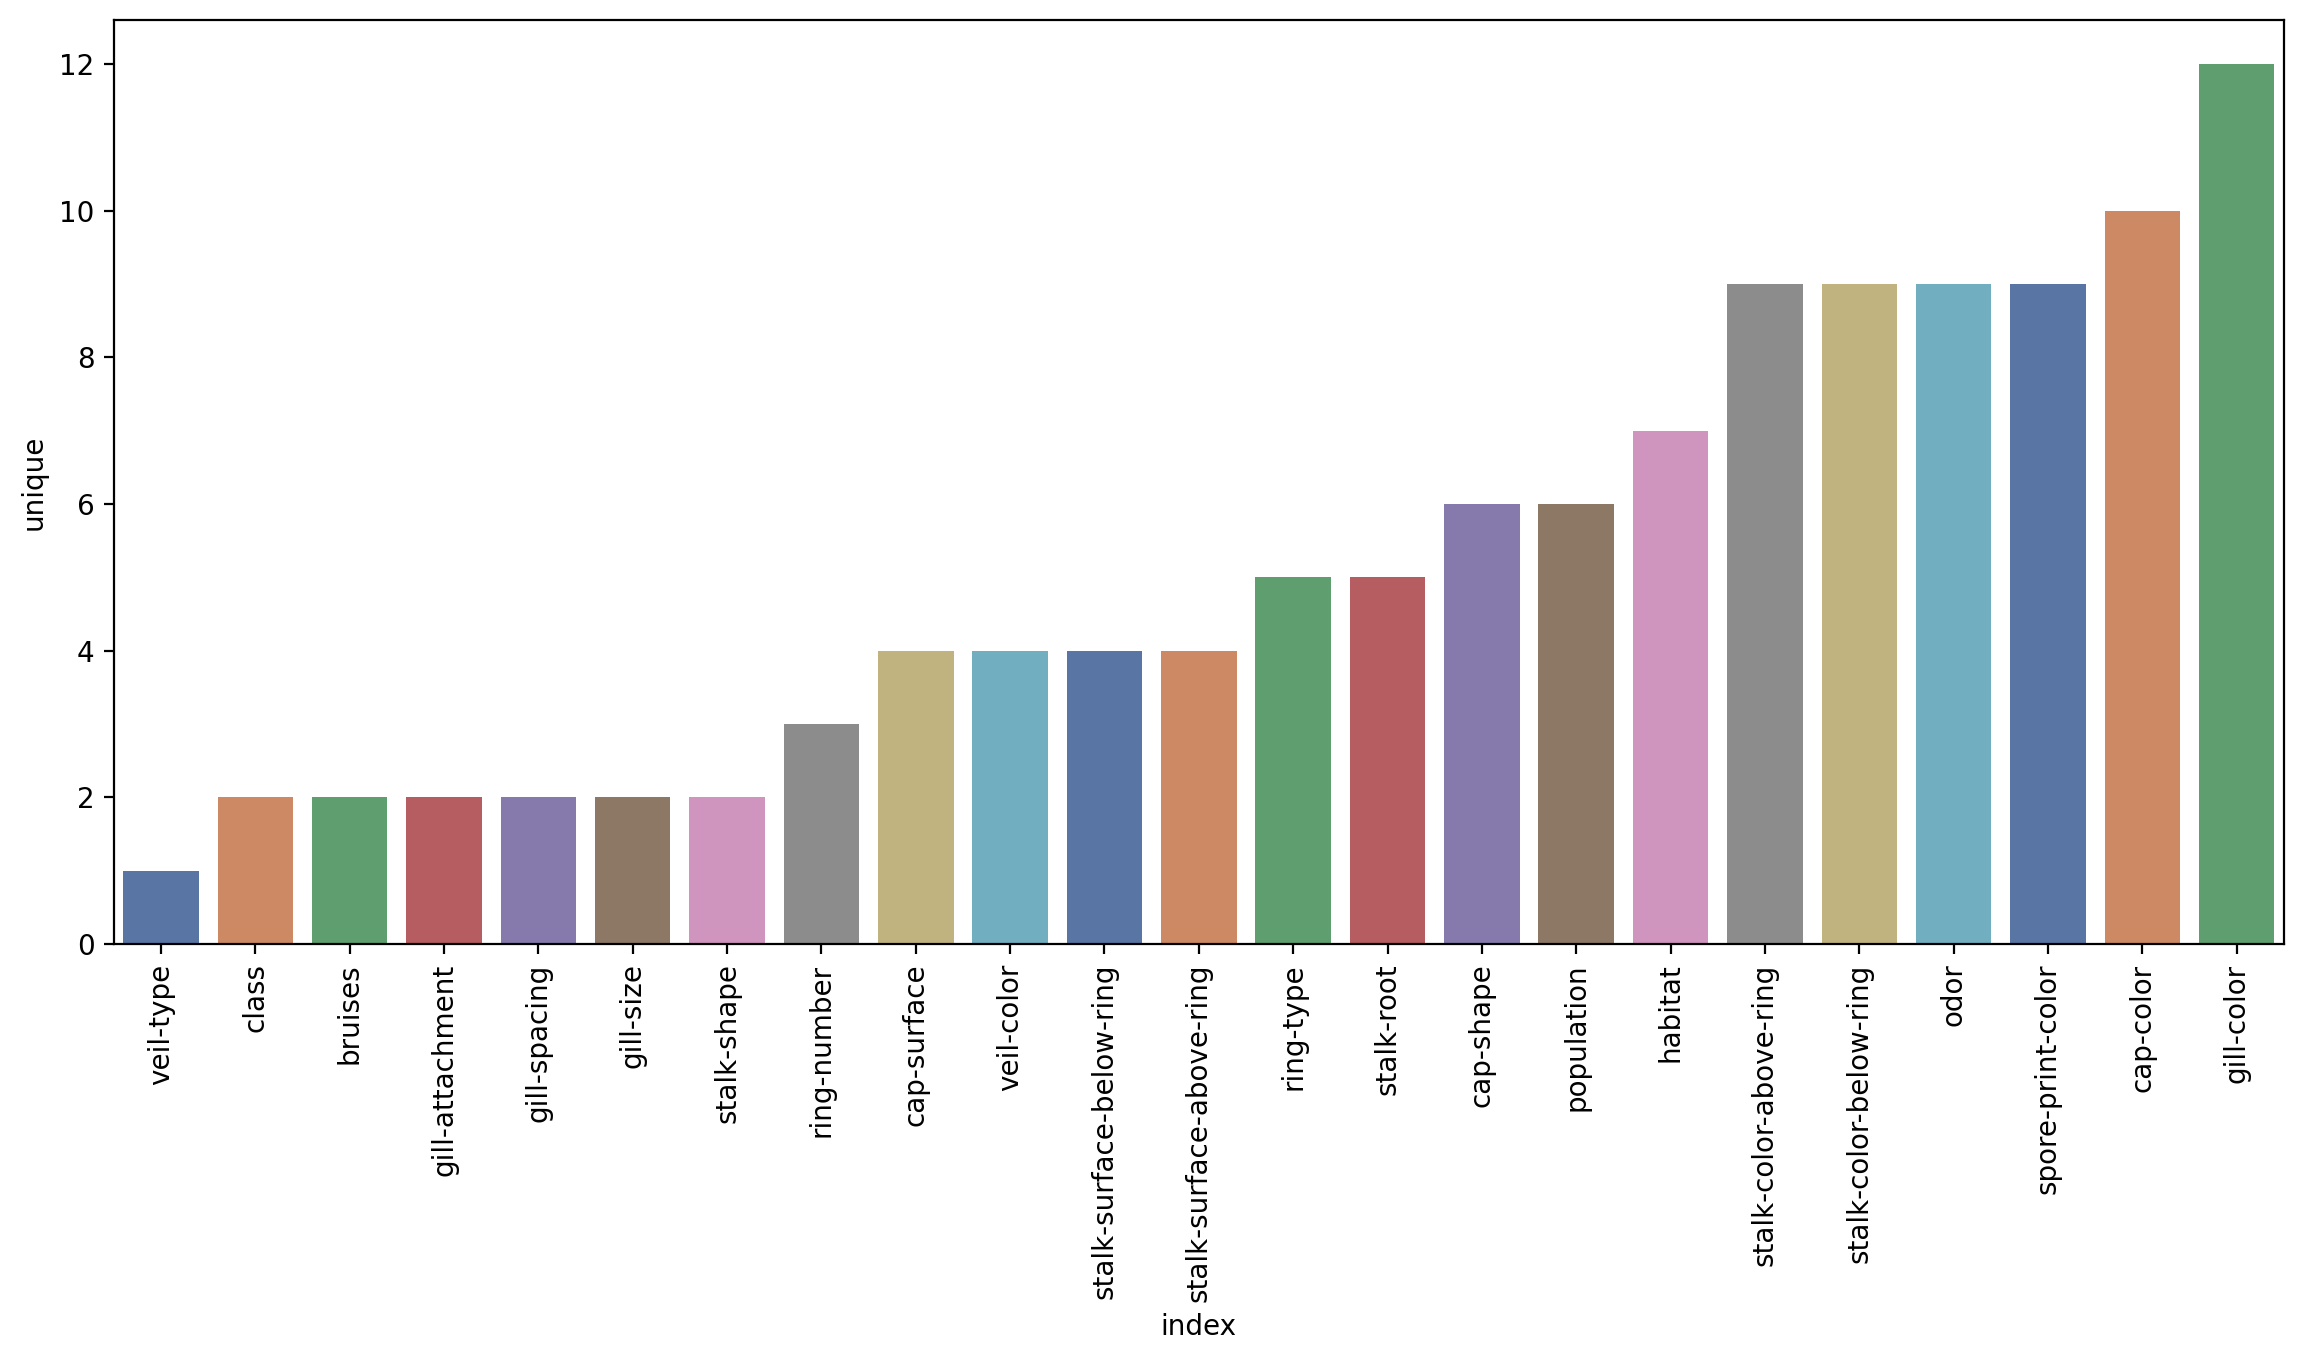

In [6]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(
    data=df.describe().transpose().reset_index().sort_values('unique'),
    x='index',
    y='unique',
    hue='index',  # Assign 'index' to 'hue'
    palette='deep',  # Choose your preferred palette
    legend=False  # Set legend to False
)
plt.xticks(rotation=90);

## Train Test Split

In [7]:
X = df.drop('class',axis=1)

In [8]:
X = pd.get_dummies(X,drop_first=True)

In [9]:
y = df['class']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## AdaBoost Modeling

AdaBoost starts by fitting an initial model (usually a decision tree) to the data.

After the first model is trained, AdaBoost increases the weights of the misclassified instances.

Then it trains a new model on the reweighted data, again focusing more on the previously misclassified instances.

This process repeats, with each subsequent model focusing more on the instances that the previous models misclassified.

The final model is a weighted sum of the weak learners.

**Key Parameters:**

    n_estimators: Number of weak learners to train iteratively.

    learning_rate: Shrinks the contribution of each classifier. There is a trade-off between learning_rate and 
    n_estimators.



In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [14]:
error_rates = []

# len(X.columns) = 95
for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

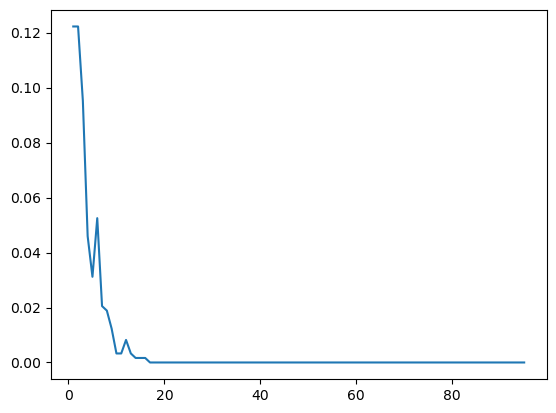

In [15]:
plt.plot(range(1,96),error_rates)

In [16]:
feature_importance = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [17]:
important_features = feature_importance[feature_importance['Importance']>0]

In [18]:
important_features

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


In [19]:
important_features = important_features.sort_values("Importance")

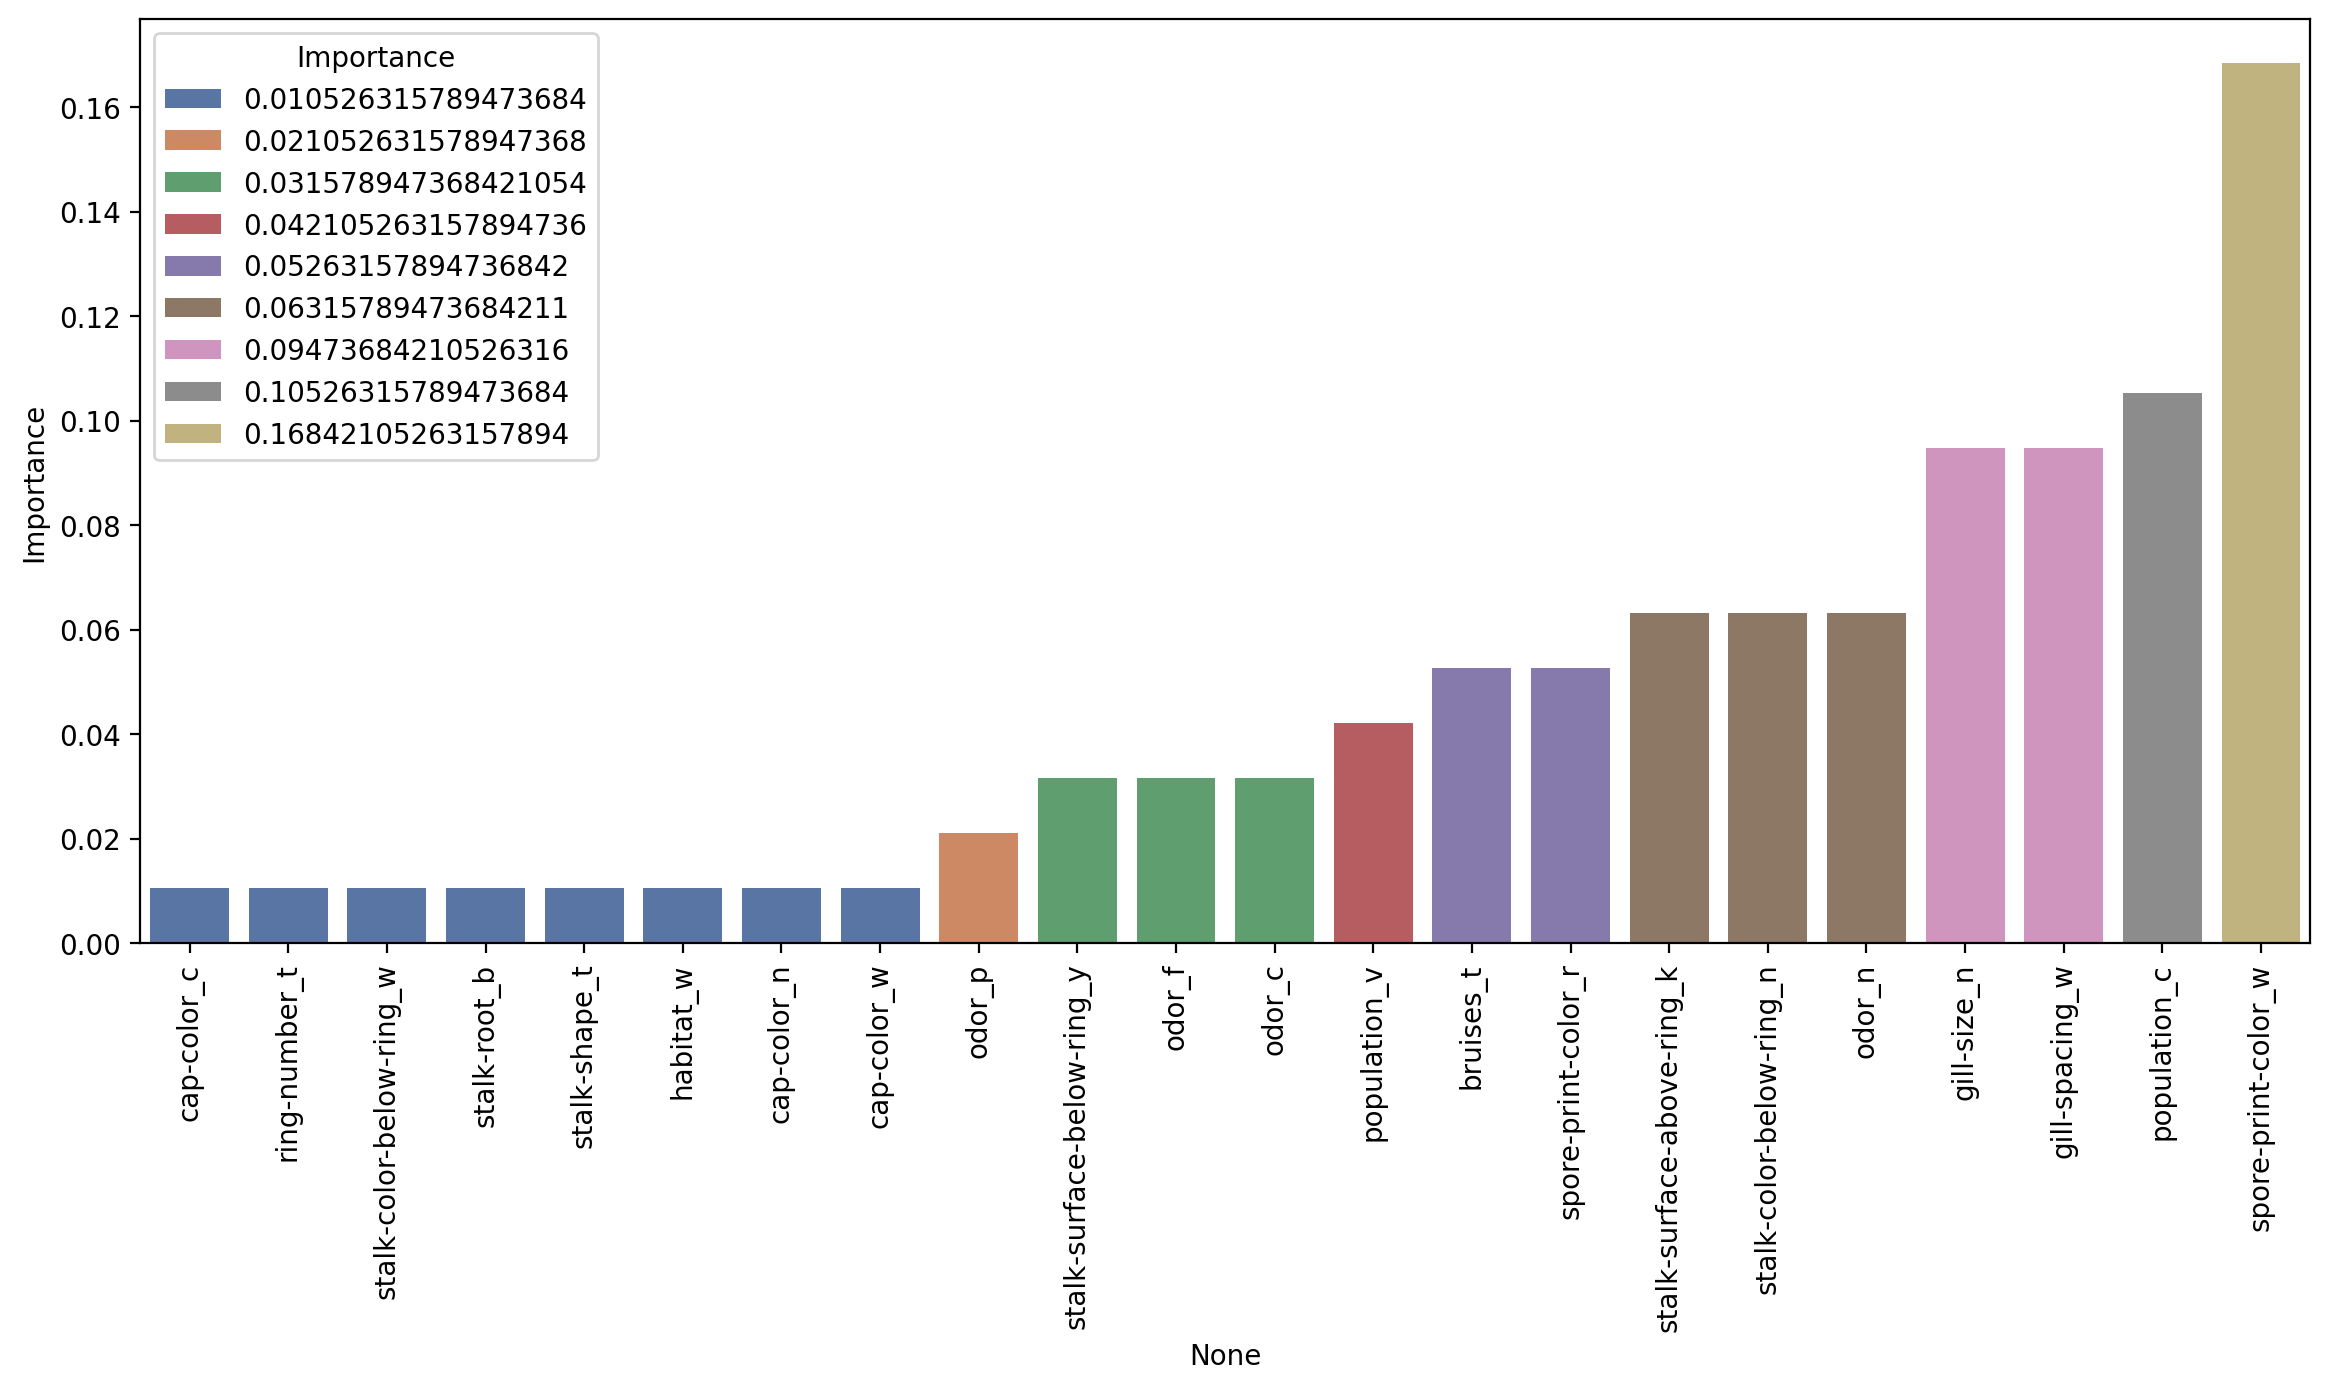

In [25]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=important_features.sort_values('Importance'),x=important_features.sort_values('Importance').index,y='Importance', hue='Importance', palette='deep',
)

plt.xticks(rotation=90);

<AxesSubplot:xlabel='habitat', ylabel='count'>

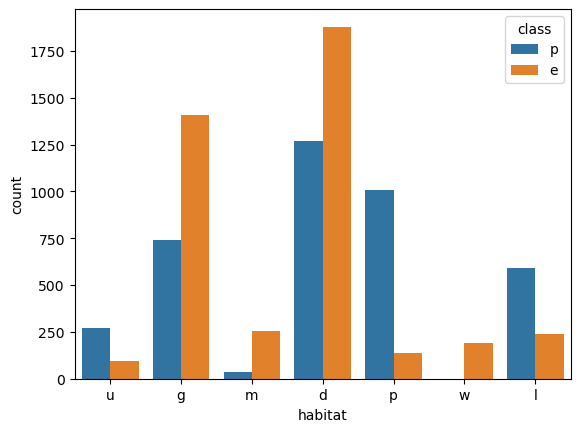

In [23]:
sns.countplot(data=df,x='habitat',hue='class')

# Gradient Boosting and Grid Search with CV

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [35]:
gb_model = GradientBoostingClassifier()

In [36]:
grid = GridSearchCV(gb_model,param_grid)

In [37]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [38]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [40]:
predictions = grid.predict(X_test)

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [42]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.58046443e-16, 0.00000000e+00, 0.00000000e+00,
       9.16847057e-17, 1.04524302e-03, 1.41061846e-17, 5.06011038e-06,
       2.20674856e-17, 0.00000000e+00, 1.96028642e-17, 0.00000000e+00,
       4.38547570e-17, 0.00000000e+00, 0.00000000e+00, 2.22085607e-08,
       2.38799475e-03, 5.41962828e-02, 6.24175887e-04, 1.72337928e-02,
       1.82499853e-02, 1.87607514e-04, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.03950811e-02, 0.00000000e+00, 2.10137338e-16, 0.00000000e+00,
       1.10035020e-17, 0.00000000e+00, 0.00000000e+00, 4.92985329e-18,
       3.11062778e-17, 0.00000000e+00, 7.87791588e-18, 0.00000000e+00,
       4.95499827e-04, 6.76478844e-04, 1.36017944e-01, 0.00000000e+00,
       4.39112690e-02, 4.47043435e-04, 2.59824622e-04, 5.48883507e-06,
       0.00000000e+00, 0.00000000e+00, 2.64859669e-02, 4.14122063e-06,
       0.00000000e+00, 0.00000000e+00, 3.67811493e-06, 0.00000000e+00,
      

In [44]:
feat_import = grid.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.136018
bruises_t,0.054196
stalk-root_r,0.043911
spore-print-color_r,0.030495
...,...
stalk-color-below-ring_p,0.000000
stalk-color-below-ring_w,0.000000
gill-attachment_f,0.000000
veil-color_y,0.000000


In [46]:
imp_feats.describe().transpose()
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]
imp_feats.sort_values('Importance')

,Importance
odor_c,0.000624
stalk-root_b,0.000676
cap-surface_g,0.001045
ring-type_p,0.001200
cap-color_y,0.002388
stalk-color-above-ring_w,0.002553
stalk-color-below-ring_y,0.003135
population_c,0.003258
spore-print-color_u,0.004100
spore-print-color_h,0.004154


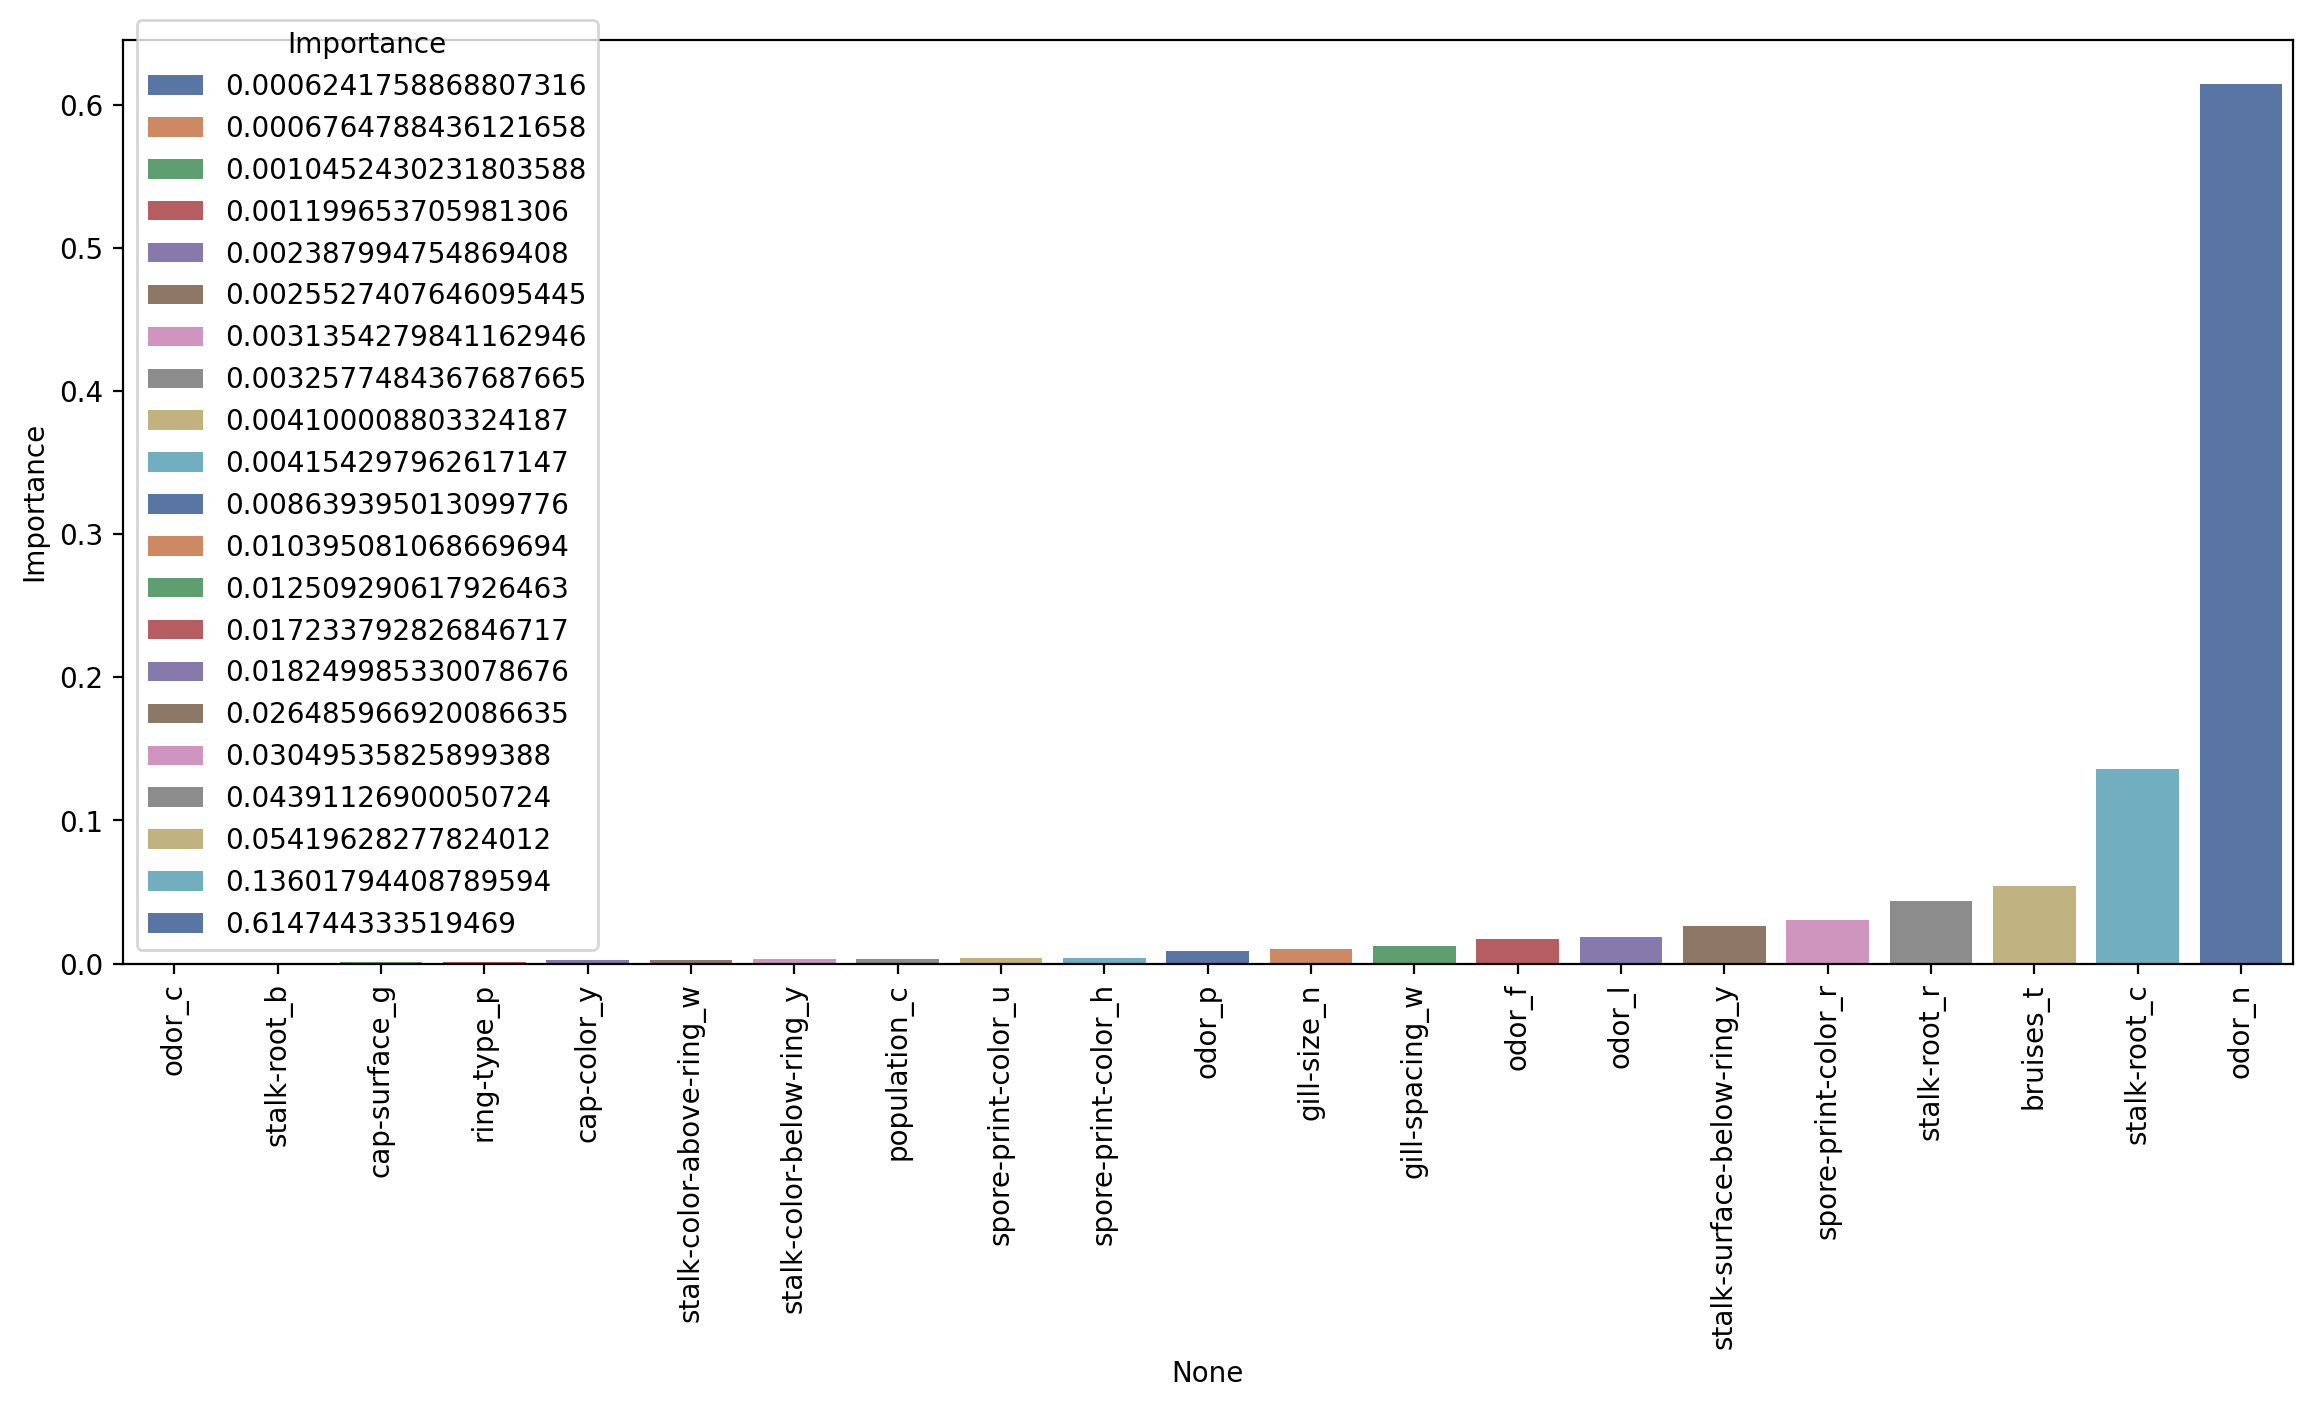

In [49]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index, y='Importance', hue='Importance', palette='deep')
plt.xticks(rotation=90);